a)

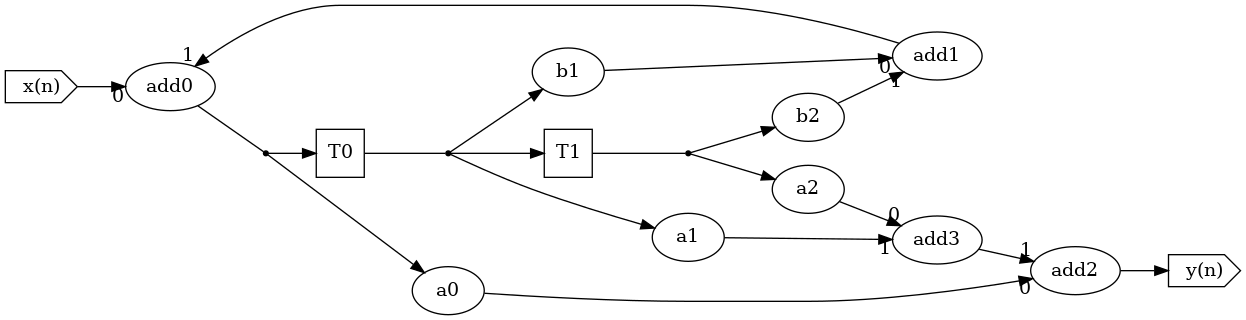

In [34]:
from b_asic.core_operations import Addition, ConstantMultiplication
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output

a0_val = 57/256
a1_val = 55/128
a2_val = 57/256
b1_val = 179/512
b2_val = -172/512

x = Input()
T0 = Delay()
T1 = Delay()

a1 = ConstantMultiplication(a1_val, T0)
a2 = ConstantMultiplication(a2_val, T1)
b1 = ConstantMultiplication(b1_val, T0)
b2 = ConstantMultiplication(b2_val, T1)

add1 = b1 + b2
add0 = x + add1
a0 = ConstantMultiplication(a0_val, add0)
add3 = a2 + a1
add2 = a0 + add3

T0 <<= add0
T1 <<= T0

y = Output(add2)

x.graph_id = "x(n)"
T0.graph_id = "T0"
T1.graph_id = "T1"
a0.graph_id = "a0"
a1.graph_id = "a1"
a2.graph_id = "a2"
b1.graph_id = "b1"
b2.graph_id = "b2"
add0.graph_id = "add0"
add1.graph_id = "add1"
add2.graph_id = "add2"
add3.graph_id = "add3"
y.graph_id = "y(n)"

sfg = SFG([x], [y])
sfg

b)

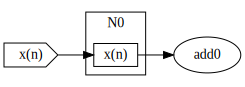

In [35]:
sfg.precedence_graph

c)

/tmp/ipykernel_222903/3627114901.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


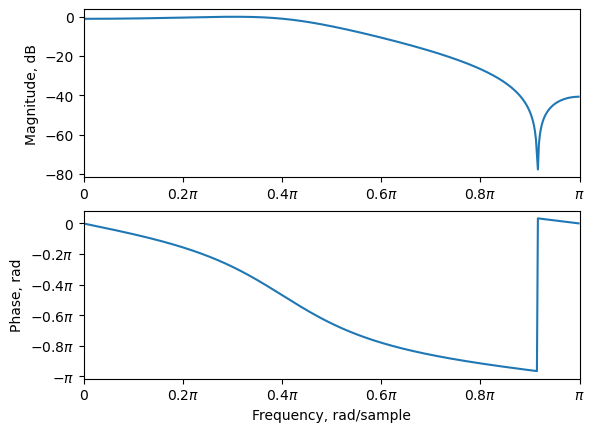

In [36]:
from b_asic.simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt
from b_asic.signal_generator import Impulse
from mplsignal.freq_plots import freqz_fir

sim = Simulation(sfg, [Impulse()])
sim.run_for(100)

fig = freqz_fir(sim.results["0"])
fig.show()

d) Passband edge ~0.4pi (-3db)  
e) about -40 dB  
f)

In [37]:
#sim.show()

(0.0, 12.0)

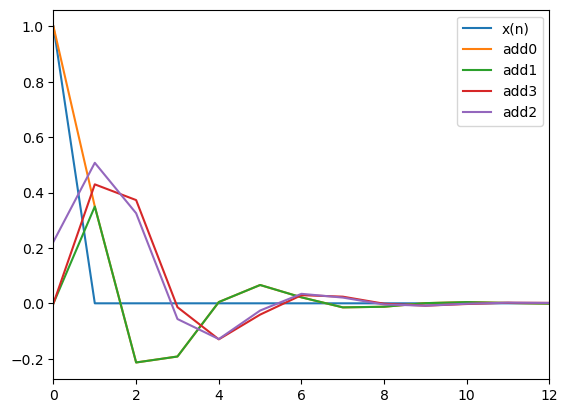

In [38]:
plt.plot(sim.results["x(n)"], label="x(n)")
plt.plot(sim.results["add0"], label="add0")
plt.plot(sim.results["add1"], label="add1")
plt.plot(sim.results["add3"], label="add3")
plt.plot(sim.results["add2"], label="add2")
plt.legend()
plt.xlim(0,12)

g) 

In [39]:
print(sum(abs(sim.results["add0"])))
print(sum(abs(sim.results["add1"])))
print(sum(abs(sim.results["add2"])))
print(sum(abs(sim.results["add3"])))

1.8835985725391626
0.8835985725391622
1.3416002915397607
1.0582914723063113


Critical: add0, add2, add3

h)

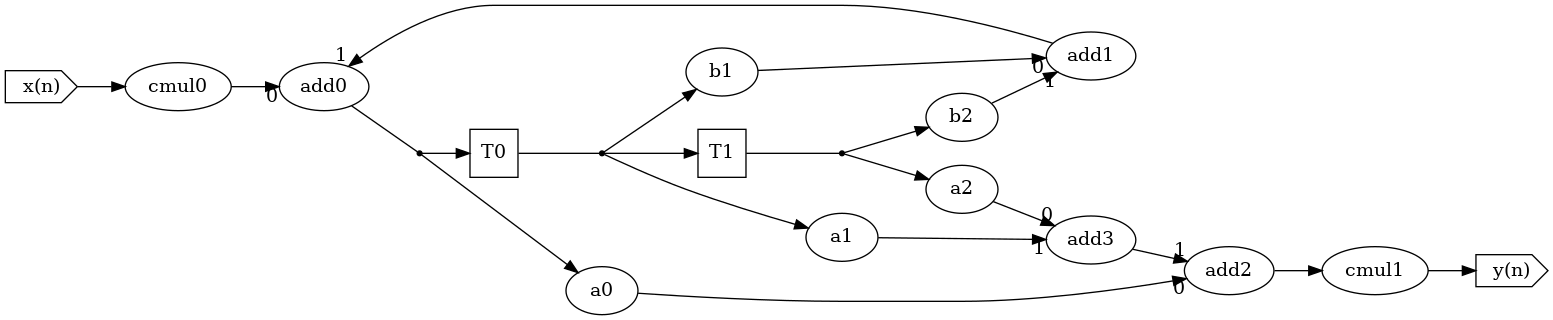

In [40]:
x = Input()
T0 = Delay()
T1 = Delay()

a1 = ConstantMultiplication(a1_val, T0)
a2 = ConstantMultiplication(a2_val, T1)
b1 = ConstantMultiplication(b1_val, T0)
b2 = ConstantMultiplication(b2_val, T1)

sys_in = ConstantMultiplication(0.5, x)

add1 = b1 + b2
add0 = (sys_in + add1)
a0 = ConstantMultiplication(a0_val, add0)
add3 = (a2 + a1)
add2 = (a0 + add3)

T0 <<= add0
T1 <<= T0

sys_out = ConstantMultiplication(2, add2)

y = Output(sys_out)

x.graph_id = "x(n)"
T0.graph_id = "T0"
T1.graph_id = "T1"
a0.graph_id = "a0"
a1.graph_id = "a1"
a2.graph_id = "a2"
b1.graph_id = "b1"
b2.graph_id = "b2"
add0.graph_id = "add0"
add1.graph_id = "add1"
add2.graph_id = "add2"
add3.graph_id = "add3"
y.graph_id = "y(n)"

sfg_new = SFG([x], [y])
sfg_new

i) 

In [41]:
sim_new = Simulation(sfg_new, [Impulse()])
sim_new.run_for(100)

print(sum(abs(sim_new.results["add0"])))
print(sum(abs(sim_new.results["add1"])))
print(sum(abs(sim_new.results["add2"])))
print(sum(abs(sim_new.results["add3"])))


0.9417992862695813
0.4417992862695811
0.6708001457698803
0.5291457361531556


j) 

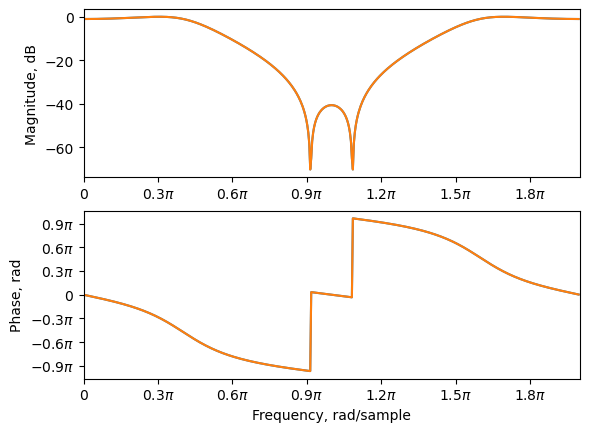

In [42]:
freqz_fir(sim.results["0"], whole=True)
fig = freqz_fir(sim_new.results["0"], whole=True)

It doesn't since we scale the input/output correctly.

k)

<StemContainer object of 3 artists>

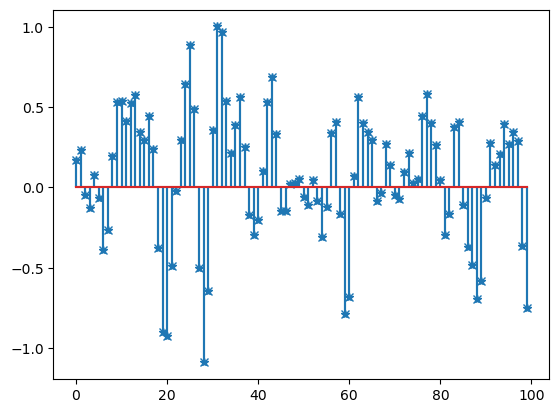

In [43]:
data = np.random.rand(100)*2 - 1
sim_new = Simulation(sfg_new, [data])
sim = Simulation(sfg, [data])
sim_new.run_for(100)
sim.run_for(100)

fig, ax = plt.subplots()
ax.stem(sim.results["0"],markerfmt="*")
ax.stem(sim_new.results["0"],markerfmt="x")


As we saw with previous question, they behave the same.